In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Loading .h5 file

import h5py
from pathlib import Path
filename = "/StokesVertexBeam/Data/hdf5/"
hdf5_dir = Path(filename)
hdf5_dir.mkdir(parents=True, exist_ok=True)

def store_many_hdf5(images, labels):
    """ Stores an array of images to HDF5.
        Parameters:
        ---------------
        images       images array, (N, 32, 32, 3) to be stored
        labels       labels array, (N, 1) to be stored
    """
    num_images = len(images)

    # Create a new HDF5 file
    # file = h5py.File(hdf5_dir / f"{num_images}_many.h5", "w")
    # file = h5py.File(hdf5_dir / f"{num_images}_303_303_many.h5", "w")
    # file = h5py.File(hdf5_dir / f"experimental_{num_images}_many.h5", "w")
    file = h5py.File(hdf5_dir / f"{num_images}_From10000each_303_303_many.h5", "w")

    # Create a dataset in the file
    dataset = file.create_dataset(
        "images", np.shape(images), h5py.h5t.STD_U8BE, data=images
    )
    meta_set = file.create_dataset(
        "meta", np.shape(labels), h5py.h5t.STD_U8BE, data=labels
    )
    file.close()

def read_many_hdf5(num_images):
    """ Reads image from HDF5.
        Parameters:
        ---------------
        num_images   number of images to read

        Returns:
        ----------
        images      images array, (N, 32, 32, 3) to be stored
        labels      associated meta data, int label (N, 1)
    """
    images, labels = [], []

    # Open the HDF5 file
    # file = h5py.File(hdf5_dir / f"{num_images}_303_303_many.h5", "r+")
    # file = h5py.File(hdf5_dir / f"{num_images}_many.h5", "r+")
    # file = h5py.File(hdf5_dir / f"experimental_{num_images}_many.h5", "r+")
    file = h5py.File(hdf5_dir / f"{num_images}_From10000each_many.h5", "r+")

    images = np.array(file["/images"]).astype("uint8")
    labels = np.array(file["/meta"]).astype("uint8")

    return images, labels

In [11]:
images, labels = read_many_hdf5(15000)

images.shape, labels.shape

((15000, 101, 707, 3), (15000, 1))

In [12]:
images = images[0:5,:,:,:]
labels = labels[0:5]
images.shape, labels.shape

((5, 101, 707, 3), (5, 1))

In [13]:
# Data Preparation
ze = np.zeros((images.shape[0], 101, 202, 3))
new_img = np.concatenate((images, ze), axis = 2)

# del ze, images

a = new_img[:, :, :303, :]
b = new_img[:, :, 303:606, :]
c = new_img[:, :, 606:909, :]

del new_img

corr_img = np.concatenate((a,b,c), axis = 1).astype(np.uint8)

del a, b, c

corr_img.shape

(5, 303, 303, 3)

In [14]:
corr_img.shape, labels.shape

((5, 303, 303, 3), (5, 1))

In [11]:
# # Save in hdf5 
# # Store the array of images and labels into hdf5 file
# store_many_hdf5(corr_img, labels)

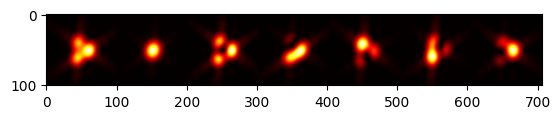

In [17]:
plt.imshow(images[0])
plt.savefig("101*707.png")

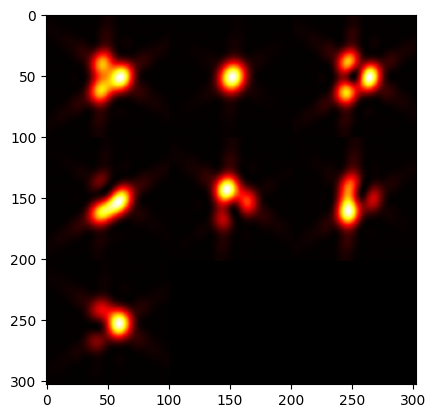

In [18]:
plt.imshow(corr_img[0])
plt.savefig("303*303.png")

In [13]:
# # data_path = "/StokesVertexBeam/Data/Transformed303x303/Simulated/"
# data_path = "/StokesVertexBeam/Data/Transformed303x303/Simulated_1000RandomFrom10000/"

# for i in range(len(labels)):
#     im = Image.fromarray(corr_img[0])
#     file_name = data_path + "Class" + str(labels[i][0]) + "/" + str(i) + ".jpg"
#     im.save(file_name)